In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Import data and create df

data = pd.read_csv("/Users/Stacy/Documents/WebDevelopment/projects/sexualAssault_datasets/2010-2018_sexcrimes_violentcrimes.csv", index_col="CAD Event Number")
data = pd.DataFrame(data)
data.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [4]:
# Rename columns to be pythonic

data.columns = ['event_clearing', 'call_type', 'priority', 
                'initial_call_type', 'final_call_type', 'original_time_queued',
               'arrived_time', 'precinct', 'sector', 'beat']

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat
CAD Event Number,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,02/27/2010 10:54:25 PM,Feb 27 2010 10:55:45:000PM,NORTH,UNION,U1
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,01/01/2010 03:13:06 AM,Jan 1 2010 03:14:51:000AM,SOUTH,ROBERT,R3
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,01/01/2010 05:46:54 AM,Jan 1 2010 06:39:35:000AM,NORTH,UNION,U1
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 06:28:49 AM,Jan 1 2010 06:40:09:000AM,EAST,GEORGE,G1
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),01/01/2010 03:05:57 PM,Jan 1 2010 03:12:26:000PM,SOUTHWEST,FRANK,F3


In [5]:
# ID all calls cancelled by dispatch
cancelled_calls = data[data.event_clearing.str.contains("CANCELLED")]

# Delete rows with cxl'd calls

data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
data = data[data.event_clearing != 'DUPLICATED OR CANCELLED BY RADIO']


In [6]:
# Change original_time_queued to datetime
data['original_time_queued'] = pd.to_datetime(data.original_time_queued)

# Change arrived_time to datetime
data['arrived_time'] = pd.to_datetime(data.arrived_time, format='%b %d %Y %I:%M:%S:%f%p')

# Add time delta between original_time_queued and arrived_time
data['time_delta'] = ((data.arrived_time - data.original_time_queued)/np.timedelta64(1, 's')).astype(int)

In [7]:
# Add columns for arrived year and month

data['year'] = data.arrived_time.dt.year
data['month'] = data.arrived_time.dt.month

In [8]:
# For rows with bad arrived time: change month and year to original_time_queued
# Where arrive_time year = 1900, change data.year and data.month to original_time_queued year

mask = data.year < 1901
column_name_year = 'year'
column_name_month = 'month'
data.loc[mask, column_name_year] = data.original_time_queued.dt.year
data.loc[mask, column_name_month] = data.original_time_queued.dt.month


data.year.value_counts()

2018    2827
2016    2624
2017    2543
2015    2491
2014    2170
2012    2162
2013    2159
2011    2118
2010    2010
Name: year, dtype: int64

In [9]:
call_types = data['final_call_type'].unique().tolist()
call_types

['--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT',
 '--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)',
 '--HOMICIDE',
 '--SEX OFFENSES (RAPE) - MOLESTING',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES',
 '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)']

In [10]:
# Define TRU initial call types
TRU_call_types = [
    'TRU - ASLT - WITH OR W/O WPNS (NO SHOOTINGS)',
    'TRU - RAPE',
    'TRU - LEWD CONDUCT',
    'TRU - CHILD ABUSED, NEGLECTED',
    'TRU - THREATS',
    'TRU - ROBBERY',
    'TRU - ASLT - MOLESTED ADULT (GROPED, FONDLED, ETC)',
    'TRU - HARASSMENT',
    'TRU - SEX IN PUBLIC',
    'TRU - THEFT',
    'TRU - FOLLOW UP',
    'TRU - MVC - HIT AND RUN',
    'TRU - LURING',
    'TRU - FORGERY/CHKS/BUNCO/SCAMS/ID THEFT',
    'TRU - SUSPICIOUS CIRCUMSTANCES']

In [11]:
# Define terms that id rape CFS
rape_terms = 'STRANGER|ACQUAINTANCE'
rape_call_types = [
    '--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
    '--RAPE - UNKNOWN SUSPECT (STRANGER)']

rape_call_types

['--RAPE - KNOWN SUSPECT (ACQUAINTANCE)',
 '--RAPE - UNKNOWN SUSPECT (STRANGER)']

In [12]:
# Define terms that id other violent crimes
violent_crime_call_types = [
    '--ASSAULTS - FIREARM INVOLVED',
    '--ROBBERY - ARMED',
    '--HOMICIDE',
    '--KIDNAP - GENERAL',
    '--DRIVE BY SHOOTING - NO INJURIES']

violent_crime_call_types

['--ASSAULTS - FIREARM INVOLVED',
 '--ROBBERY - ARMED',
 '--HOMICIDE',
 '--KIDNAP - GENERAL',
 '--DRIVE BY SHOOTING - NO INJURIES']

In [13]:
# ID all clearing codes
clearing_codes = data['event_clearing'].unique().tolist()
# clearing_codes

In [14]:
# ID arrest clearing codes

arrest_cc = ['PHYSICAL ARREST MADE']

## Add columns for arrest, TRU, and crime type

In [15]:
# Add column identifying if there was an arrest

data['is_arrest'] = np.where(data['event_clearing'].isin(arrest_cc), 'yes', 'no')

In [16]:
# Add column identifying if this was A TRU call

data['is_TRU'] = np.where(data['initial_call_type'].isin(TRU_call_types), 'yes', 'no')

# data.is_TRU.unique().tolist()

In [17]:
# Add column identifying crime type
data['crime_type'] = np.where(data['final_call_type'].isin(rape_call_types), 'rape', 'violent crime')

data.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape


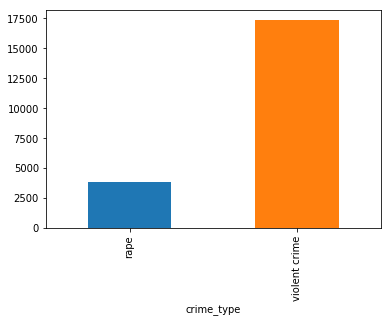

In [18]:
# Count of rape calls v. other violent crime calls

data['final_call_type'].groupby(data['crime_type']).count().plot(kind='bar')

In [19]:
# Use crosstab to return value counts
# Reference: https://colab.research.google.com/drive/1VtMSdMy396U6BGVdz2qRsgRveYW9uTHi#scrollTo=FVB-Gc0lAH1W
# and: https://stackoverflow.com/questions/53108063/python-pandas-data-visualization-how-to-get-percentages-for-each-row-and-v

arrest_percent = pd.crosstab(data.crime_type,data.is_arrest,
                          normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing. 
arrest_percent *= 100

arrest_percent

is_arrest,no,yes
rape,93.751655,6.248345
violent crime,90.846656,9.153344


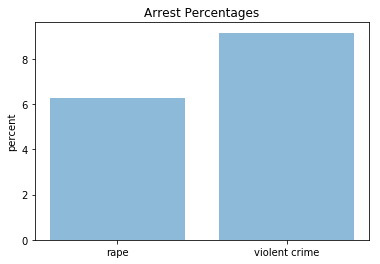

In [20]:
# Plot only arrests as bar graph. 
plt.bar(arrest_percent.index, arrest_percent.yes, align='center', alpha=0.5)
plt.ylabel('percent')
plt.title('Arrest Percentages')

plt.show()

In [21]:
# Create crosstab to view all arrests by call type

all_calls_arrest = pd.crosstab(data.final_call_type,data.is_arrest,
                          normalize = 'index').rename_axis(None)
all_calls_arrest *= 100

all_calls_arrest

is_arrest,no,yes
--ASSAULTS - FIREARM INVOLVED,88.855055,11.144945
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),88.461538,11.538462
--DRIVE BY SHOOTING - NO INJURIES,96.675416,3.324584
--HOMICIDE,93.023256,6.976744
--KIDNAP - GENERAL,73.232323,26.767677
--RAPE - KNOWN SUSPECT (ACQUAINTANCE),92.529489,7.470511
--RAPE - UNKNOWN SUSPECT (STRANGER),95.631720,4.368280
--ROBBERY - ARMED,87.385087,12.614913
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,93.071042,6.928958
--SEX OFFENSES (RAPE) - MOLESTING,94.352617,5.647383


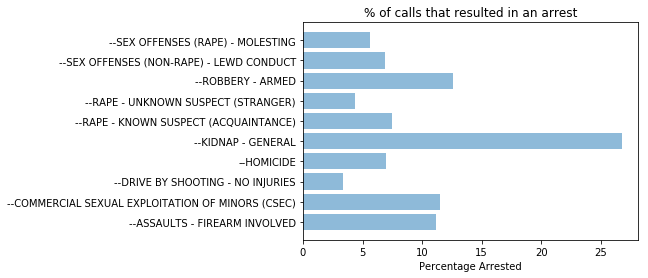

In [22]:
# Plot only arrest percentages as bar graph. 
plt.barh(all_calls_arrest.index, all_calls_arrest.yes, align='center', alpha=0.5, orientation='horizontal')
plt.xlabel('Percentage Arrested')
plt.title('% of calls that resulted in an arrest')
#plt.xticks(rotation=90)

plt.show()

## Analysis of rate of arrests (rape v. VC) by year

### To Do:
* Add year to arrest_percent analysis

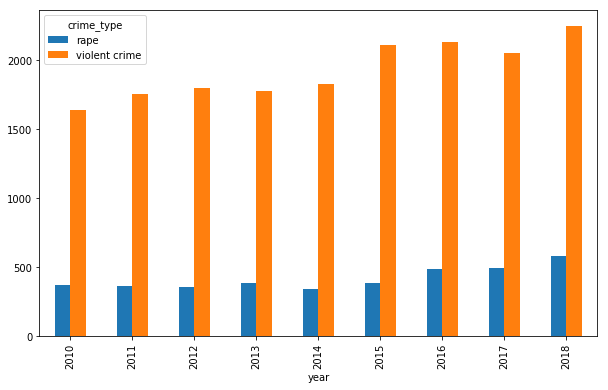

In [23]:
# year by year analysis of arrests rape v. VC - counts


data.groupby('crime_type').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,6))


In [24]:
# Create new df that shows arrest counts by each year for both crime types

arrests_grouped = data.groupby(["crime_type","year", "is_arrest"]).count()

arrests_grouped.head()

event_clearing  call_type  priority  \
crime_type year is_arrest                                        
rape       2010 no                    345        345       345   
                yes                    29         29        29   
           2011 no                    338        338       338   
                yes                    25         25        25   
           2012 no                    324        324       324   

                           initial_call_type  final_call_type  \
crime_type year is_arrest                                       
rape       2010 no                       345              345   
                yes                       29               29   
           2011 no                       338              338   
                yes                       25               25   
           2012 no                       324              324   

                           original_time_queued  arrived_time  precinct  \
crime_type year is_arrest                                                 
rape       2010 no                          345           345       345   
                yes                          29            29        29   
           2011 no                          338           338       338   
                yes                          25            25        25   
           2012 no                          324           324       324   

                           sector  beat  time_delta  month  is_TRU  
crime_type year is_arrest                                           
rape       2010 no            340   345         345    345     345  
                yes            28    29          29     29      29  
           2011 no            321   338         338    338     338  
                yes            25    25          25     25      25  
           2012 no            309   324         324    324     324

In [ ]:
#this is being used on other notebook, keeping year by year data:
stage_is_violent_crime.groupby('event_clearing').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8), )


In [25]:
# Calculate arrest percentages by crime type for each year
arrest_percent_by_yr = pd.crosstab([data.crime_type, data.year],data.is_arrest,
                         normalize = 'index')

# Multiply all percentages by 100 for graphing. 
arrest_percent_by_yr *= 100

arrest_percent_by_yr

is_arrest                  no        yes
crime_type    year                      
rape          2010  92.245989   7.754011
              2011  93.112948   6.887052
              2012  89.750693  10.249307
              2013  93.506494   6.493506
              2014  95.086705   4.913295
              2015  92.987013   7.012987
              2016  94.704684   5.295316
              2017  96.551724   3.448276
              2018  94.300518   5.699482
violent crime 2010  89.180929  10.819071
              2011  90.883191   9.116809
              2012  90.394225   9.605775
              2013  91.319053   8.680947
              2014  92.050439   7.949561
              2015  92.117759   7.882241
              2016  91.373652   8.626348
              2017  90.048780   9.951220
              2018  90.080071   9.919929

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ce9cef0>,
      dtype=object)

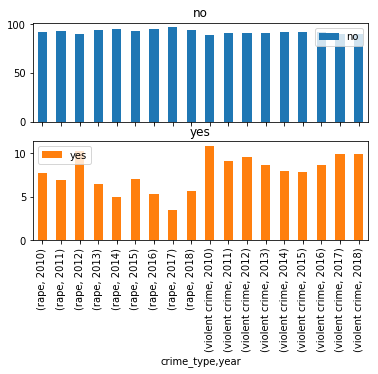

In [26]:
# year by year analysis of arrest percentages rape v. VC - counts


#arrest_percent.groupby('crime_type').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,6))
#arrest_percent_by_yr.groupby(level=[['rape', 'violent crime'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]).year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(12,8), )


arrest_percent_by_yr.plot(kind='bar', subplots=True)

# Plot only arrests as bar graph. 
#plt.bar(arrest_percent_by_yr['rape', 'violent crime'], arrest_percent.yes, align='center', alpha=0.5)
#plt.ylabel('percent')
#plt.title('Arrest Percentages')

#plt.show()


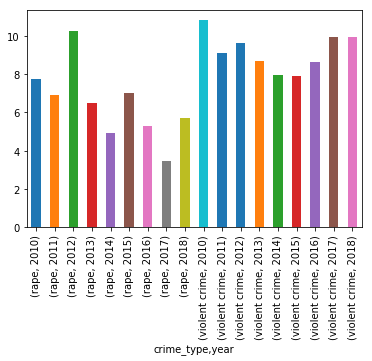

In [27]:
# Plot % of arrests by crime type for each year.
# Need to group the two crime types together for each year

arrest_percent_by_yr['yes'].plot(kind='bar')

#arrest_percent_by_yr.groupby('crime_type')['yes'].plot(kind='bar')

## TRU work

In [28]:
# Create crosstab to view % all TRU calls by crime type

percentage_tru_calls = pd.crosstab(data.final_call_type,data.is_TRU,
                          normalize = 'index').rename_axis(None)
percentage_tru_calls *= 100

percentage_tru_calls

is_TRU,no,yes
--ASSAULTS - FIREARM INVOLVED,99.025579,0.974421
--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC),98.076923,1.923077
--DRIVE BY SHOOTING - NO INJURIES,99.912511,0.087489
--HOMICIDE,100.000000,0.000000
--KIDNAP - GENERAL,98.989899,1.010101
--RAPE - KNOWN SUSPECT (ACQUAINTANCE),97.597204,2.402796
--RAPE - UNKNOWN SUSPECT (STRANGER),98.655914,1.344086
--ROBBERY - ARMED,99.914879,0.085121
--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,99.076139,0.923861
--SEX OFFENSES (RAPE) - MOLESTING,97.176309,2.823691


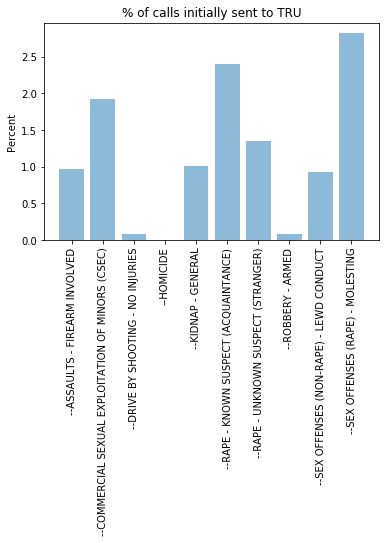

In [29]:
# Plot TRU call percentages as bar graph. 
plt.bar(percentage_tru_calls.index, percentage_tru_calls.yes, align='center', alpha=0.5)
plt.ylabel('Percent')
plt.title('% of calls initially sent to TRU')
plt.xticks(rotation=90)

plt.show()

## TRU breakdown
**CSEC:**
only 1 of the 52 CSEC calls were referred to TRU in 9 years.
**code:**
Show that only 1 of the 52 CSEC calls were referred to TRU in 9 years:
temp_TRU_df = data[data.is_TRU == 'yes']
temp_TRU_CSEC = temp_TRU_df[temp_TRU_df.final_call_type == '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)']
temp_TRU_CSEC

Show all CSEC calls:
data[data.final_call_type == '--COMMERCIAL SEXUAL EXPLOITATION OF MINORS (CSEC)'].count()

**molesting:**
41 to TRU out of 1452 calls

**kidnap:**
2 out of 198 send to TRU

**assault w firearm:**
16 out of 1642

**driveby:**
1 out of 1143

**acquaintance rape:**
55 out of 2289

**stranger rape:**
20 out of 1488

**armed robbery:**
5 out of 5874

**lewd conduct:**
58 out of 6278

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



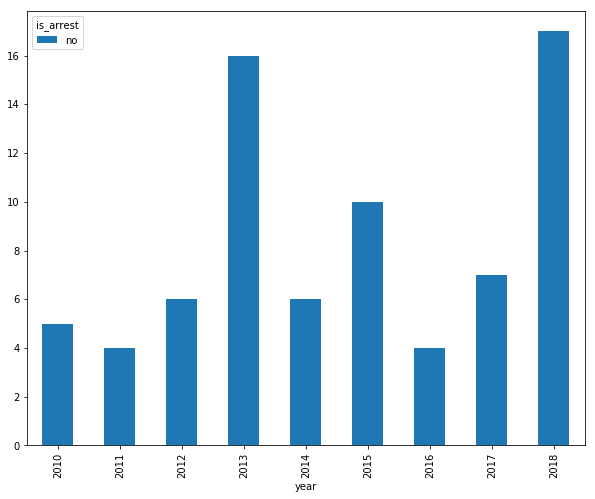

In [30]:
# Show TRU rape calls by year

temp_TRU_df = data[data.is_TRU == 'yes']
temp_TRU_df = temp_TRU_df[data.crime_type == "rape"]

temp_TRU_df.groupby('is_arrest').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,8))


In [91]:
# Do above by in percentages

In [31]:
# Create crosstab to view % TRU rape calls vs. TRU VC calls

tru_calls_rape_vc = pd.crosstab(data.crime_type,data.is_TRU,
                          normalize = 'index').rename_axis(None)
tru_calls_rape_vc *= 100

tru_calls_rape_vc

is_TRU,no,yes
rape,98.014297,1.985703
violent crime,99.284354,0.715646


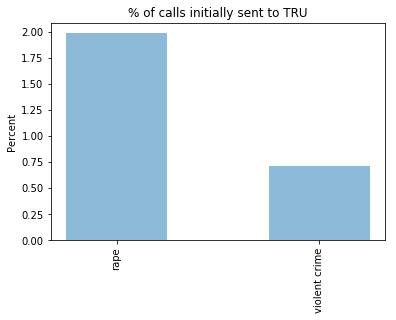

In [32]:
# Plot percentage TRU calls rape v. VC as bar graph. 
plt.bar(tru_calls_rape_vc.index, tru_calls_rape_vc.yes, align='center', alpha=0.5, width=0.5)
plt.ylabel('Percent')
plt.title('% of calls initially sent to TRU')
plt.xticks(rotation=90)

plt.show()

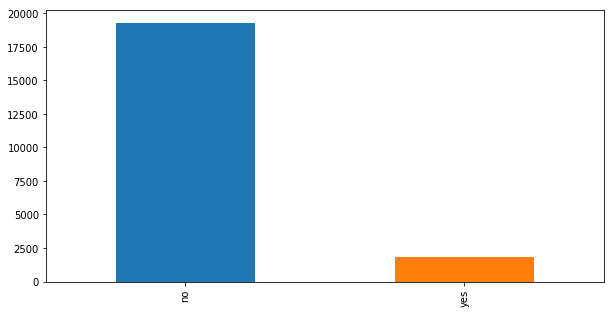

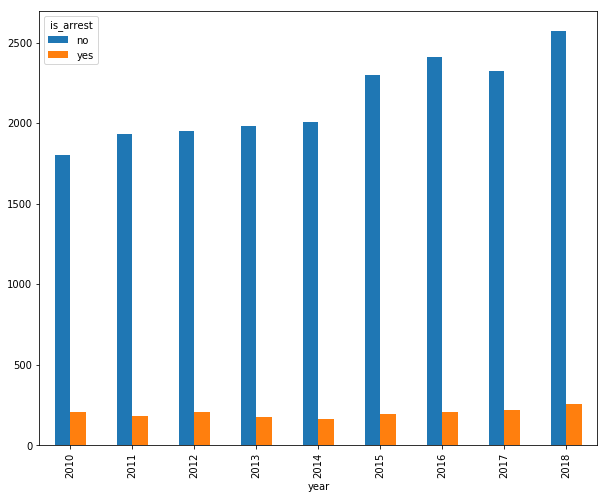

In [33]:
# example viz only
pd.value_counts(data.is_arrest).plot.bar(figsize=(10,5))
data.groupby('is_arrest').year.value_counts().unstack(0).plot.bar(stacked=False, figsize=(10,8))



## Lewd Calls Correlation

In [36]:
data

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape
2010000000876,REPORT WRITTEN (NO ARREST),ONVIEW,3,RAPE,--RAPE - UNKNOWN SUSPECT (STRANGER),2010-01-01 17:28:02,2010-01-01 17:28:02,EAST,GEORGE,G1,0,2010,1,no,no,rape
2010000000989,FOLLOW-UP REPORT MADE,ONVIEW,3,FOLLOW UP,--ASSAULTS - FIREARM INVOLVED,2010-01-01 20:17:12,2010-01-01 20:17:12,SOUTH,SAM,S1,0,2010,1,no,no,violent crime
2010000001058,FOLLOW-UP REPORT MADE,ONVIEW,2,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--ROBBERY - ARMED,2010-01-01 21:43:41,2010-01-01 21:43:41,SOUTH,SAM,S3,0,2010,1,no,no,violent crime
2010000001201,ASSISTANCE RENDERED,911,2,"LEWD - (EXPOSING, FLASHING, URINATING IN PUB)",--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-01-02 00:37:29,2010-01-02 00:42:16,WEST,DAVID,D2,287,2010,1,no,no,violent crime


In [41]:
# Remove rows with bad arrived_time


#data = data[data.event_clearing != 'RESPONDING UNIT(S) CANCELLED BY RADIO']
#value_to_check = pd.Timestamp('1900-01-01 00:00:00')
 #       (df['date'] < '2013-02-01')
    # df[datetime(2014, 5, 3):]
#lewd_calls_ip = data[data['arrived_time' != '1900']]
#mask = (data['arrived_time'] > '1900-1-1')

lewd_calls_ip = data[data.arrived_time > '1900-1-1']
lewd_calls_ip.head()

,event_clearing,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,time_delta,year,month,is_arrest,is_TRU,crime_type
CAD Event Number,,,,,,,,,,,,,,,,
2010000066820,ASSISTANCE RENDERED,911,2,MENTAL - PERSON OR PICKUP/TRANSPORT,--SEX OFFENSES (NON-RAPE) - LEWD CONDUCT,2010-02-27 22:54:25,2010-02-27 22:55:45,NORTH,UNION,U1,80,2010,2,no,no,violent crime
2010000000327,PHYSICAL ARREST MADE,911,1,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--ASSAULTS - FIREARM INVOLVED,2010-01-01 03:13:06,2010-01-01 03:14:51,SOUTH,ROBERT,R3,105,2010,1,yes,no,violent crime
2010000000451,REPORT WRITTEN (NO ARREST),911,2,THEFT OF SERVICES,--ROBBERY - ARMED,2010-01-01 05:46:54,2010-01-01 06:39:35,NORTH,UNION,U1,3161,2010,1,no,no,violent crime
2010000000466,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 06:28:49,2010-01-01 06:40:09,EAST,GEORGE,G1,680,2010,1,no,no,rape
2010000000776,REPORT WRITTEN (NO ARREST),911,3,RAPE,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),2010-01-01 15:05:57,2010-01-01 15:12:26,SOUTHWEST,FRANK,F3,389,2010,1,no,no,rape


In [42]:
# Create df for all in progress lewd calls
lewd_calls_ip = lewd_calls_ip[lewd_calls_ip.final_call_type.str.contains("LEWD")]
lewd_calls_ip = lewd_calls_ip[lewd_calls_ip.priority <= 3]

lewd_calls_ip.time_delta

CAD Event Number
2010000066820       80
2010000001201      287
2010000001517     1251
2010000004224      747
2010000006248     4872
2010000007437     2874
2010000009757      286
2010000010699      262
2010000012598      717
2010000013324     2547
2010000013672        2
2010000014091      736
2010000015098     2112
2010000016360     1410
2010000016587        0
2010000017270      211
2010000019213     1753
2010000019291      179
2010000022413      597
2010000022667      478
2010000024175      223
2010000024186      399
2010000027161     9800
2010000028421      841
2010000028424      665
2010000028495      892
2010000029442     1681
2010000029676      763
2010000029957      479
2010000031352       92
                 ...  
2018000466134     3379
2018000466311      694
2018000467922        0
2018000467930     4519
2018000468840        0
2018000468862      282
2018000469237     4961
2018000469630      357
2018000470150      692
2018000471483        0
2018000472189      928
2018000475979    

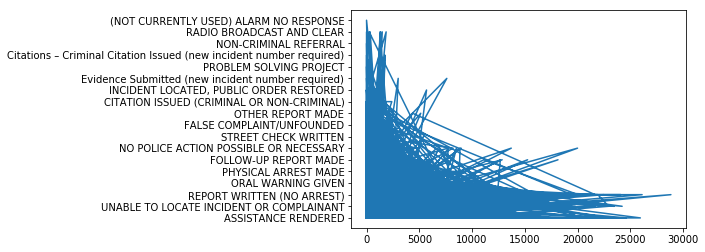

In [43]:
x = lewd_calls_ip.time_delta
y = lewd_calls_ip.event_clearing

plt.plot(x, y)
plt.show(); 


In [178]:

lewd_calls_ip.corr()

,priority,time_delta,year,month
priority,NaN,NaN,NaN,NaN
time_delta,NaN,1.000000,-0.004755,0.092091
year,NaN,-0.004755,1.000000,0.011164
month,NaN,0.092091,0.011164,1.000000
